In [46]:
import radiant as rad
import numpy as np
from ipywidgets import IntProgress
from IPython.display import display


a = 0
b = 1

f = lambda x: x * np.cos(2 * np.pi * x / (b - a))

In [53]:
d = 1
k = 1

levels = 10
ns = 2 ** np.array(range(1, levels + 1, 1), dtype=int)
deltas = 0.5 ** np.array(range(1, levels + 1, 1))

print("No. centres:", ns)
print("Deltas:     ", deltas)

centres = [np.linspace(a, b, n) for n in ns]
phis = [rad.phi_factory(d, k, d) for d in deltas]
weights = [np.zeros_like(c) for c in centres]
interps = []

prog = IntProgress(min=0, max=levels)
display(prog)
for i in range(levels):
    weights[i] = f(centres[i])
    for j in range(i):
        weights[i] -= interps[j](centres[i])
        
    interps.append(rad.combine(phis[i], centres[i], weights[i]))
    
    prog.value += 1

prog.close()

f_approx = lambda x: sum([s(x) for s in interps])

No. centres: [   2    4    8   16   32   64  128  256  512 1024]
Deltas:      [0.5        0.25       0.125      0.0625     0.03125    0.015625
 0.0078125  0.00390625 0.00195312 0.00097656]


IntProgress(value=0, max=10)

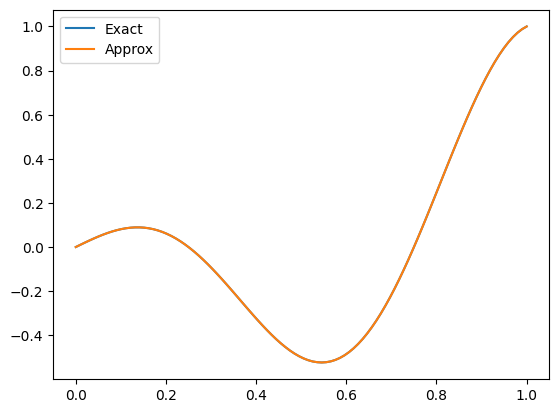

In [54]:
rad.plot.overlay(f, f_approx, a, b)